# Report

# Environment Setup and Import

In [2]:
# Standard Libraries
import shutil
import urllib.request as urlrequest
from collections import Counter
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile
# 3rd-party Libraries
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from OGDUtils.general.fileio import FileAPI, FileTypes
print(os.getcwd())
!pip install --quiet -r ../../requirements.txt

2023-06-29 00:07:28.472246: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 00:07:32.149930: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 00:07:32.151086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 00:07:37.332814: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/workspaces/opengamedata-samples/AQUALAB/modeling

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Change pandas `max_rows` and `max_columns`

In [3]:
pd.options.display.max_columns = 4000 #@param {type:"integer"}
pd.options.display.max_rows = 60 #@param {type:"integer"}

## Load Data

#### Please change the settings below to configure which game/server location you want to use.

<!-- `ogd_server` : The file server that contains the actual data files -->
* `game_id` : The game whose data you want to access.
* `mode` : The kind of data you want to retrieve. Should be one of `FileTypes.PLAYER`, `FileTypes.POPULATION`, `FileTypes.SESSION`, `FileTypes.EVENTS` or `FileTypes.ALL_EVENTS`

In [4]:
game_id = 'AQUALAB'
mode    = FileTypes.EVENTS

In [ ]:
months_list = FileAPI.GetAvailableMonths(game_id)
print(f"The available months are:")
pprint(months_list, compact=True)

In [ ]:
month = 2
year = 2023

# download the file if it doesn't exist.
zip_file, dataset_name = FileAPI.DownloadZippedDataset(game_id, month, year, mode)

In [ ]:
zip_name = zip_file.filename
print(zip_name)

In [ ]:
raw_data = pd.DataFrame()

# Open TSV from the zip file.
MAX_ROWS = 10000 # for the sake of not overwhelming RAM, only read first 10,000 rows of an events file
tsv_name = f"{zip_name[:zip_name.rfind('.')]}.tsv"
with zip_file.open(f"{dataset_name}/{tsv_name}") as tsv_file:
    raw_data = pd.read_csv(tsv_file, sep='\t', nrows=MAX_ROWS)
    data_readme = zip_file.read(f"{dataset_name}/readme.md")
zip_file.close()

In [6]:
for col, dtype in zip(raw_data, raw_data.dtypes):
  if dtype == "string":
    try:
      raw_data[col] = pd.to_timedelta(typed_draw_dataata[col])
    except:
      try:
        typed_draw_dataata[col] = pd.to_numeric(raw_data[col])
      except:
        pass
  elif dtype == "object":
      try:
        raw_data[col] = pd.to_numeric(raw_data[col])
      except:
        pass

print(f"This dataframe contains data of the following types:\n{raw_data.dtypes.unique()}\n")
print(f"Per feature, the data types are:\n{raw_data.dtypes}")

This dataframe contains data of the following types:
[dtype('O') dtype('int64') dtype('float64')]

Per feature, the data types are:
PlayerID                                     object
SessionCount                                  int64
ActiveTime                                   object
JobsCompleted                                object
SessionDiveSitesCount                         int64
                                             ...   
job60_JobsAttempted-num-completes             int64
job60_JobsAttempted-percent-complete          int64
job60_JobsAttempted-avg-time-per-attempt    float64
job60_JobsAttempted-std-dev-per-attempt       int64
job60_JobsAttempted-job-difficulties         object
Length: 1359, dtype: object


Sample Rows

In [7]:
rows_to_show = 4
raw_data.head(rows_to_show)

,PlayerID,SessionCount,ActiveTime,JobsCompleted,SessionDiveSitesCount,SessionGuideCount,SessionHelpCount,SessionID,SessionJobsCompleted,SwitchJobsCount,TopJobCompletionDestinations,TopJobSwitchDestinations,TotalArgumentationTime,TotalDiveTime,TotalExperimentationTime,job0_JobActiveTime,job1_JobActiveTime,job2_JobActiveTime,job3_JobActiveTime,job4_JobActiveTime,job5_JobActiveTime,job6_JobActiveTime,job7_JobActiveTime,job8_JobActiveTime,job9_JobActiveTime,job10_JobActiveTime,job11_JobActiveTime,job12_JobActiveTime,job13_JobActiveTime,job14_JobActiveTime,job15_JobActiveTime,job16_JobActiveTime,job17_JobActiveTime,job18_JobActiveTime,job19_JobActiveTime,job20_JobActiveTime,job21_JobActiveTime,job22_JobActiveTime,job23_JobActiveTime,job24_JobActiveTime,job25_JobActiveTime,job26_JobActiveTime,job27_JobActiveTime,job28_JobActiveTime,job29_JobActiveTime,job30_JobActiveTime,job31_JobActiveTime,job32_JobActiveTime,job33_JobActiveTime,job34_JobActiveTime,job35_JobActiveTime,job36_JobActiveTime,job37_JobActiveTime,job38_JobActiveTime,job39_JobActiveTime,job40_JobActiveTime,job41_JobActiveTime,job42_JobActiveTime,job43_JobActiveTime,job44_JobActiveTime,job45_JobActiveTime,job46_JobActiveTime,job47_JobActiveTime,job48_JobActiveTime,job49_JobActiveTime,job50_JobActiveTime,job51_JobActiveTime,job52_JobActiveTime,job53_JobActiveTime,job54_JobActiveTime,job55_JobActiveTime,job56_JobActiveTime,job57_JobActiveTime,job58_JobActiveTime,job59_JobActiveTime,job60_JobActiveTime,job0_JobArgumentationTime,job1_JobArgumentationTime,job2_JobArgumentationTime,job3_JobArgumentationTime,job4_JobArgumentationTime,job5_JobArgumentationTime,job6_JobArgumentationTime,job7_JobArgumentationTime,job8_JobArgumentationTime,job9_JobArgumentationTime,job10_JobArgumentationTime,job11_JobArgumentationTime,job12_JobArgumentationTime,job13_JobArgumentationTime,job14_JobArgumentationTime,job15_JobArgumentationTime,job16_JobArgumentationTime,job17_JobArgumentationTime,job18_JobArgumentationTime,job19_JobArgumentationTime,job20_JobArgumentationTime,job21_JobArgumentationTime,job22_JobArgumentationTime,job23_JobArgumentationTime,job24_JobArgumentationTime,job25_JobArgumentationTime,job26_JobArgumentationTime,job27_JobArgumentationTime,job28_JobArgumentationTime,job29_JobArgumentationTime,job30_JobArgumentationTime,job31_JobArgumentationTime,job32_JobArgumentationTime,job33_JobArgumentationTime,job34_JobArgumentationTime,job35_JobArgumentationTime,job36_JobArgumentationTime,job37_JobArgumentationTime,job38_JobArgumentationTime,job39_JobArgumentationTime,job40_JobArgumentationTime,job41_JobArgumentationTime,job42_JobArgumentationTime,job43_JobArgumentationTime,job44_JobArgumentationTime,job45_JobArgumentationTime,job46_JobArgumentationTime,job47_JobArgumentationTime,job48_JobArgumentationTime,job49_JobArgumentationTime,job50_JobArgumentationTime,job51_JobArgumentationTime,job52_JobArgumentationTime,job53_JobArgumentationTime,job54_JobArgumentationTime,job55_JobArgumentationTime,job56_JobArgumentationTime,job57_JobArgumentationTime,job58_JobArgumentationTime,job59_JobArgumentationTime,job60_JobArgumentationTime,job0_JobCompletionTime,job1_JobCompletionTime,job2_JobCompletionTime,job3_JobCompletionTime,job4_JobCompletionTime,job5_JobCompletionTime,job6_JobCompletionTime,job7_JobCompletionTime,job8_JobCompletionTime,job9_JobCompletionTime,job10_JobCompletionTime,job11_JobCompletionTime,job12_JobCompletionTime,job13_JobCompletionTime,job14_JobCompletionTime,job15_JobCompletionTime,job16_JobCompletionTime,job17_JobCompletionTime,job18_JobCompletionTime,job19_JobCompletionTime,job20_JobCompletionTime,job21_JobCompletionTime,job22_JobCompletionTime,job23_JobCompletionTime,job24_JobCompletionTime,job25_JobCompletionTime,job26_JobCompletionTime,job27_JobCompletionTime,job28_JobCompletionTime,job29_JobCompletionTime,job30_JobCompletionTime,job31_JobCompletionTime,job32_JobCompletionTime,job33_JobCompletionTime,job34_JobCompletionTime,job35_JobCompletionTime,job36_JobCompletionTime,job37_J

Summary

In [8]:
raw_data.describe()

,SessionCount,SessionDiveSitesCount,SessionGuideCount,SessionHelpCount,SessionJobsCompleted,SwitchJobsCount,job0_JobActiveTime,job1_JobActiveTime,job2_JobActiveTime,job3_JobActiveTime,job4_JobActiveTime,job5_JobActiveTime,job6_JobActiveTime,job7_JobActiveTime,job8_JobActiveTime,job9_JobActiveTime,job10_JobActiveTime,job11_JobActiveTime,job12_JobActiveTime,job13_JobActiveTime,job14_JobActiveTime,job15_JobActiveTime,job16_JobActiveTime,job17_JobActiveTime,job18_JobActiveTime,job19_JobActiveTime,job20_JobActiveTime,job21_JobActiveTime,job22_JobActiveTime,job23_JobActiveTime,job24_JobActiveTime,job25_JobActiveTime,job26_JobActiveTime,job27_JobActiveTime,job28_JobActiveTime,job29_JobActiveTime,job30_JobActiveTime,job31_JobActiveTime,job32_JobActiveTime,job33_JobActiveTime,job34_JobActiveTime,job35_JobActiveTime,job36_JobActiveTime,job37_JobActiveTime,job38_JobActiveTime,job39_JobActiveTime,job40_JobActiveTime,job41_JobActiveTime,job42_JobActiveTime,job43_JobActiveTime,job44_JobActiveTime,job45_JobActiveTime,job46_JobActiveTime,job47_JobActiveTime,job48_JobActiveTime,job49_JobActiveTime,job50_JobActiveTime,job51_JobActiveTime,job52_JobActiveTime,job53_JobActiveTime,job54_JobActiveTime,job55_JobActiveTime,job56_JobActiveTime,job57_JobActiveTime,job58_JobActiveTime,job59_JobActiveTime,job60_JobActiveTime,job0_JobDiveSitesCount,job1_JobDiveSitesCount,job2_JobDiveSitesCount,job3_JobDiveSitesCount,job4_JobDiveSitesCount,job5_JobDiveSitesCount,job6_JobDiveSitesCount,job7_JobDiveSitesCount,job8_JobDiveSitesCount,job9_JobDiveSitesCount,job10_JobDiveSitesCount,job11_JobDiveSitesCount,job12_JobDiveSitesCount,job13_JobDiveSitesCount,job14_JobDiveSitesCount,job15_JobDiveSitesCount,job16_JobDiveSitesCount,job17_JobDiveSitesCount,job18_JobDiveSitesCount,job19_JobDiveSitesCount,job20_JobDiveSitesCount,job21_JobDiveSitesCount,job22_JobDiveSitesCount,job23_JobDiveSitesCount,job24_JobDiveSitesCount,job25_JobDiveSitesCount,job26_JobDiveSitesCount,job27_JobDiveSitesCount,job28_JobDiveSitesCount,job29_JobDiveSitesCount,job30_JobDiveSitesCount,job31_JobDiveSitesCount,job32_JobDiveSitesCount,job33_JobDiveSitesCount,job34_JobDiveSitesCount,job35_JobDiveSitesCount,job36_JobDiveSitesCount,job37_JobDiveSitesCount,job38_JobDiveSitesCount,job39_JobDiveSitesCount,job40_JobDiveSitesCount,job41_JobDiveSitesCount,job42_JobDiveSitesCount,job43_JobDiveSitesCount,job44_JobDiveSitesCount,job45_JobDiveSitesCount,job46_JobDiveSitesCount,job47_JobDiveSitesCount,job48_JobDiveSitesCount,job49_JobDiveSitesCount,job50_JobDiveSitesCount,job51_JobDiveSitesCount,job52_JobDiveSitesCount,job53_JobDiveSitesCount,job54_JobDiveSitesCount,job55_JobDiveSitesCount,job56_JobDiveSitesCount,job57_JobDiveSitesCount,job58_JobDiveSitesCount,job59_JobDiveSitesCount,job60_JobDiveSitesCount,job0_JobGuideCount,job1_JobGuideCount,job2_JobGuideCount,job3_JobGuideCount,job4_JobGuideCount,job5_JobGuideCount,job6_JobGuideCount,job7_JobGuideCount,job8_JobGuideCount,job9_JobGuideCount,job10_JobGuideCount,job11_JobGuideCount,job12_JobGuideCount,job13_JobGuideCount,job14_JobGuideCount,job15_JobGuideCount,job16_JobGuideCount,job17_JobGuideCount,job18_JobGuideCount,job19_JobGuideCount,job20_JobGuideCount,job21_JobGuideCount,job22_JobGuideCount,job23_JobGuideCount,job24_JobGuideCount,job25_JobGuideCount,job26_JobGuideCount,job27_JobGuideCount,job28_JobGuideCount,job29_JobGuideCount,job30_JobGuideCount,job31_JobGuideCount,job32_JobGuideCount,job33_JobGuideCount,job34_JobGuideCount,job35_JobGuideCount,job36_JobGuideCount,job37_JobGuideCount,job38_JobGuideCount,job39_JobGuideCount,job40_JobGuideCount,job41_JobGuideCount,job42_JobGuideCount,job43_JobGuideCount,job44_JobGuideCount,job45_JobGuideCount,job46_JobGuideCount,job47_JobGuideCount,job48_JobGuideCount,job49_JobGuideCount,job50_JobGuideCount,job51_JobGuideCount,job52_JobGuideCount,job53_JobGuideCount,job54_JobGuideCount,job55_JobGuideCount,job56_JobGuideCount,job57_JobGuideCount,job58_JobGuideCount,job59_JobGuideCount,job60_JobGuideCount,job0_JobHelpCount,

In [9]:
#@markdown Do you want to filter player list?
Answer  = False#@param {type:"boolean"}
#@markdown Please change the file path if your player list is located differently.
PL_Path = "PlayerList.txt"#@param {type:"string"}
if Answer:
  player_list = pd.read_csv(JUPYTER_DIR / Path(PL_Path), sep='t', names=["Player"])
  raw_data = raw_data[raw_data.PlayerId.isin()]

Workable Dataframe After Dropping NAs

In [10]:
df_session = raw_data.dropna()


#### Type Conversions

In [11]:
for col, dtype in zip(df_session, df_session.dtypes):
  if dtype == "string":
    try:
      df_session[col] = pd.to_timedelta(df_session[col])
    except:
      pass

In [12]:
#Parameters for cleaning

#@markdown Type a perjob feature name here
Interested_perjobfeature = 'ArgumentationTime'#@param {type:"string"}
#@markdown Does it have a corresponding aggreation feature with same name? Check it if yes.
Answer  = True#@param {type:"boolean"}
id_columns = pd.Index(["SessionID", "PlayerID"])

In [13]:
# change interested columns into strings
# #dtypes for all columns
df_Interested = df_session.convert_dtypes()

In [14]:
#if dtype is string, change to timedelta if possible
for col, dtype in zip(df_Interested, df_Interested.dtypes):
  if dtype == "string":
    try:
      df_Interested[col] = pd.to_timedelta(df_Interested[col])
    except:
      pass

In [15]:
#data frame we want to change to time delta
target_columns = df_Interested.columns[df_Interested.columns.str.contains(Interested_perjobfeature)]
df_Interested = df_Interested[id_columns.append(target_columns)].copy()

In [16]:
#turn time into seconds
for col in target_columns:
  df_Interested[col] = df_Interested[col].dt.total_seconds()
df_Interested.dtypes

SessionID                     string[python]
PlayerID                      string[python]
TotalArgumentationTime               float64
job0_JobArgumentationTime            float64
job1_JobArgumentationTime            float64
                                   ...      
job56_JobArgumentationTime           float64
job57_JobArgumentationTime           float64
job58_JobArgumentationTime           float64
job59_JobArgumentationTime           float64
job60_JobArgumentationTime           float64
Length: 64, dtype: object

In [18]:
#find outliers of what columns
outlier = 4000 #@param {type:"integer"}
bigoutliers = np.where(df_Interested[target_columns].ge(outlier)) 
#df of outliers
#df_Interested[target_columns].iloc[bigoutliers]

In [19]:
df_Interested.drop(df_Interested.iloc[:, :2], inplace = True, axis = 1)

# Overview

## Data Overview

In [20]:
#split depending on prefix, clean columns
cols_split = []
for col in df_session.columns:
  pieces = col.split('_')
  prefix = pieces[0]
  if prefix.startswith('job') or prefix.startswith('int') or prefix.startswith('obj') \
  or prefix.startswith('SA')  or prefix.startswith('Q'):
    cols_split.append(pieces[1])
  else:
    cols_split.append(col)
col_set = Counter(cols_split)
print(f"{len(df_session.columns)} Columns in {len(col_set)} groups:")
pprint(col_set, compact=False)

1359 Columns in 39 groups:
Counter({'JobActiveTime': 61,
         'JobArgumentationTime': 61,
         'JobCompletionTime': 61,
         'JobDiveSitesCount': 61,
         'JobDiveTime': 61,
         'JobExperimentationTime': 61,
         'JobGuideCount': 61,
         'JobHelpCount': 61,
         'JobHelpCount-ByTask': 61,
         'JobLocationChanges': 61,
         'JobLocationChanges-ByTask': 61,
         'JobModelingTime': 61,
         'JobTasksCompleted': 61,
         'SyncCompletionTime': 61,
         'JobsAttempted': 61,
         'JobsAttempted-job-name': 61,
         'JobsAttempted-num-starts': 61,
         'JobsAttempted-num-completes': 61,
         'JobsAttempted-percent-complete': 61,
         'JobsAttempted-avg-time-per-attempt': 61,
         'JobsAttempted-std-dev-per-attempt': 61,
         'JobsAttempted-job-difficulties': 61,
         'PlayerID': 1,
         'SessionCount': 1,
         'ActiveTime': 1,
         'JobsCompleted': 1,
         'SessionDiveSitesCount': 1,
     

In [21]:
#data types in each column
df_session.dtypes

PlayerID                                     object
SessionCount                                  int64
ActiveTime                                   object
JobsCompleted                                object
SessionDiveSitesCount                         int64
                                             ...   
job60_JobsAttempted-num-completes             int64
job60_JobsAttempted-percent-complete          int64
job60_JobsAttempted-avg-time-per-attempt    float64
job60_JobsAttempted-std-dev-per-attempt       int64
job60_JobsAttempted-job-difficulties         object
Length: 1359, dtype: object

In [22]:
#Data frame to analyze
target = 'job' #@param {type:"string"}
target_columns = df_session.columns[~df_session.columns.str.contains(target)]
df_Aggregate = df_session[target_columns].copy()

# Visualizations

Amount of players

In [23]:
#Amount of unique PlayerIDs - amount of players
len(df_Aggregate['PlayerID'])

954

How long did they play?

In [24]:
df_column = df_session['UserTotalSessionDuration'] #column must be integers

The average time spent was 7755.409853249476 seconds


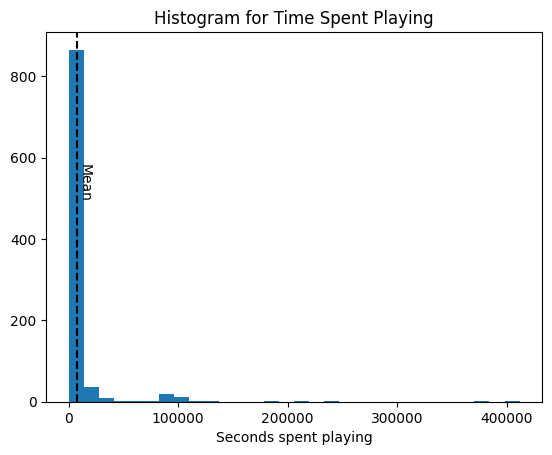

In [112]:
#jobs completed
f, ax = plt.subplots()
ax.hist(df_column, bins=30)
ax.axvline(x=df_column.mean(), linestyle='--', color='k', label="Median")
ax.text(x=df_column.mean() + 0.25, y=500, s="Mean", rotation=-90)
ax.set_xlabel("Seconds spent playing")
ax.set_title("Histogram for Time Spent Playing")
print(f'The average time spent was {df_column.mean()} seconds')

How far did the players get?

In [25]:

#@parameter
df_column = df_session['SessionJobsCompleted'] #column must be integers

The average amount of levels completed: 3.0964360587002098


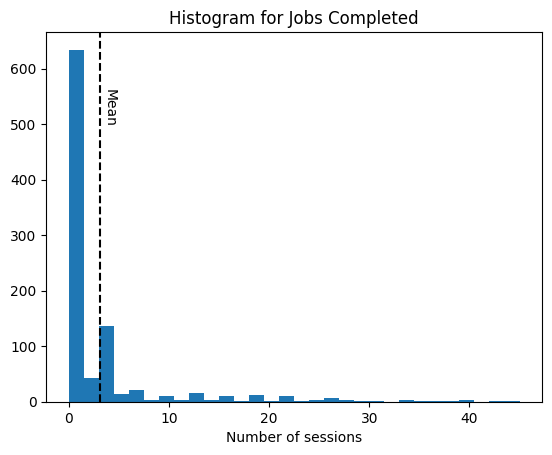

In [114]:
#jobs completed
f, ax = plt.subplots()
ax.hist(df_column, bins=30)
ax.axvline(x=df_column.mean(), linestyle='--', color='k', label="Median")
ax.text(x=df_column.mean() + 0.25, y=500, s="Mean", rotation=-90)
ax.set_xlabel("Number of sessions")
ax.set_title("Histogram for Jobs Completed")
print(f'The average amount of levels completed: {df_column.mean()}')

X vs Y Scatter Plot

In [26]:
#scatter plot columns
col1 = 'SessionHelpCount' #@param{type:"string"}
col2 = 'SessionJobsCompleted'#@param{type:"string"}

Slope of line: 3.096436058700207


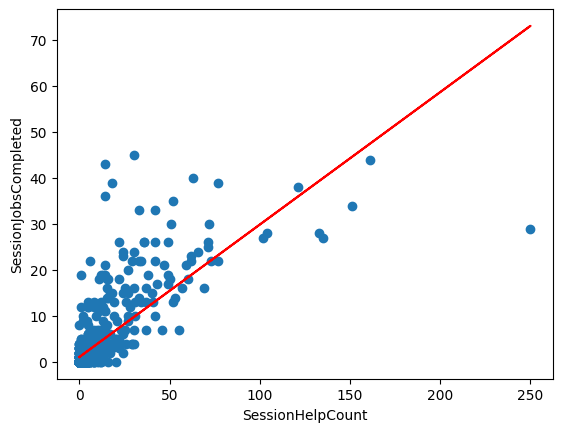

In [27]:
plt.scatter(df_session[col1], df_session[col2])
m, b = np.polyfit(df_session[col1], df_session[col2], 1)
plt.plot(df_session[col1], m*df_session[col1]+b, color = 'red')
plt.xlabel(col1)
plt.ylabel(col2)
print(f'Slope of line: {(m*df_session[col1]+b).mean()}')

Amount of Sessions vs Avg Length of Session

In [28]:
#scatter plot columns
col1 = 'SessionCount' #@param{type:"string"}
col2 = 'UserAvgSessionDuration'#@param{type:"string"}

Slope of line: 2582.9565433741677


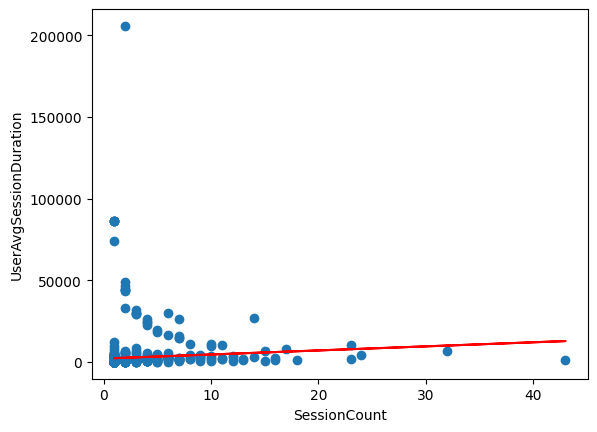

In [29]:
plt.scatter(df_Aggregate[col1], df_Aggregate[col2])
m, b = np.polyfit(df_Aggregate[col1], df_Aggregate[col2], 1)
plt.plot(df_Aggregate[col1], m*df_Aggregate[col1]+b, color = 'red')
plt.xlabel(col1)
plt.ylabel(col2)
print(f'Slope of line: {(m*df_session[col1]+b).mean()}')

/tmp/ipykernel_932/3084540358.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_Aggregate[target_cols].hist(ax=ax)


array([[<Axes: title={'center': 'SessionDiveSitesCount'}>,
        <Axes: title={'center': 'SessionGuideCount'}>,
        <Axes: title={'center': 'SessionHelpCount'}>],
       [<Axes: title={'center': 'SessionJobsCompleted'}>,
        <Axes: title={'center': 'SwitchJobsCount'}>,
        <Axes: title={'center': 'UserAvgSessionDuration'}>],
       [<Axes: title={'center': 'UserTotalSessionDuration'}>, <Axes: >,
        <Axes: >]], dtype=object)

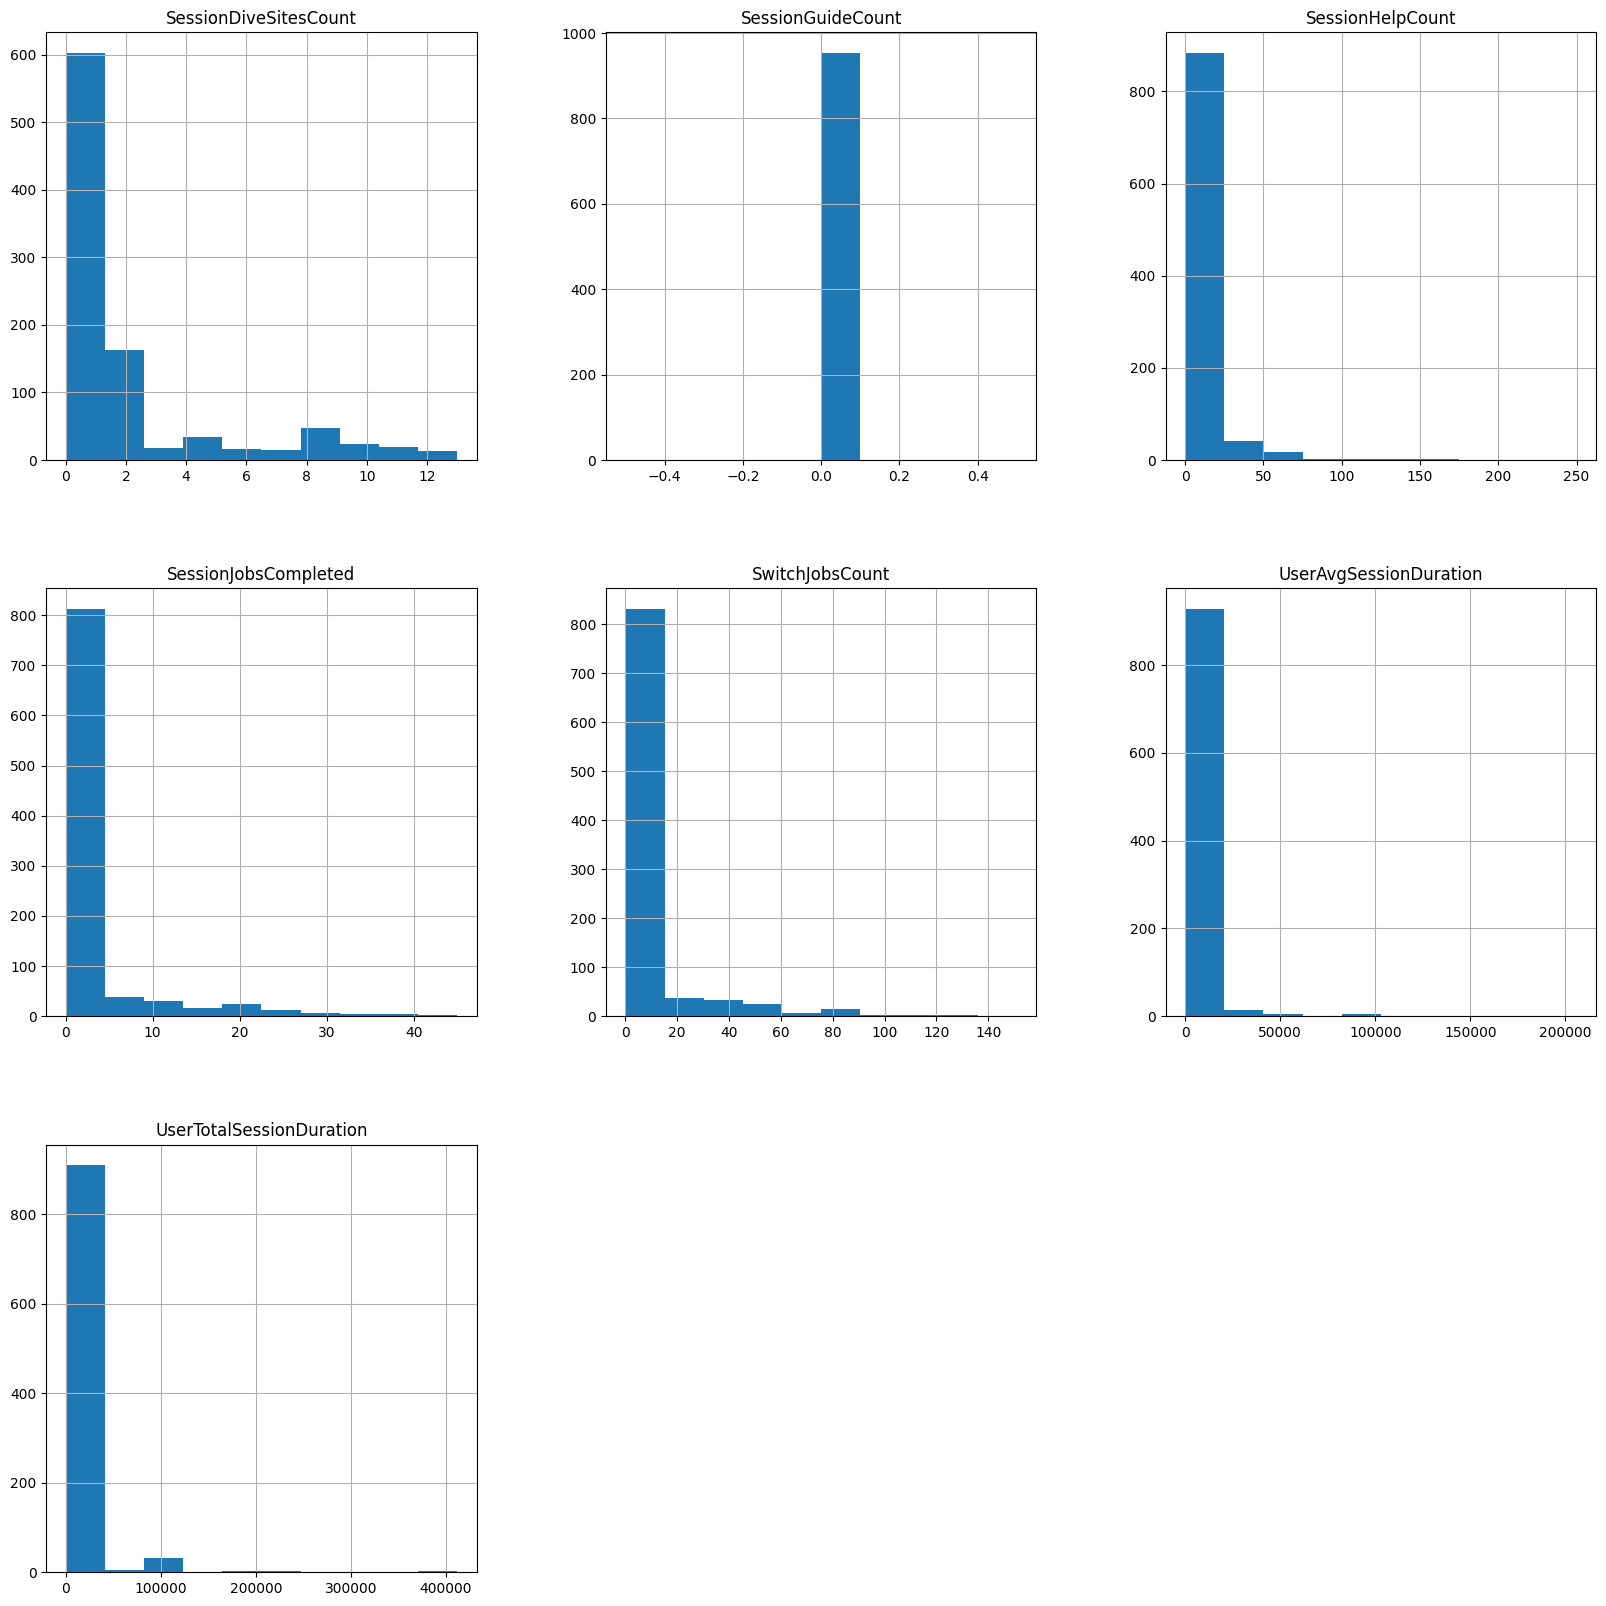

In [30]:
target_cols = ['SessionDiveSitesCount', 'SessionGuideCount', 'SessionHelpCount', 'SessionJobsCompleted', 'SwitchJobsCount', 'UserAvgSessionDuration', 'UserTotalSessionDuration']
        
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
df_Aggregate[target_cols].hist(ax=ax)

Heatmap across columns x,y,z...

<Axes: >

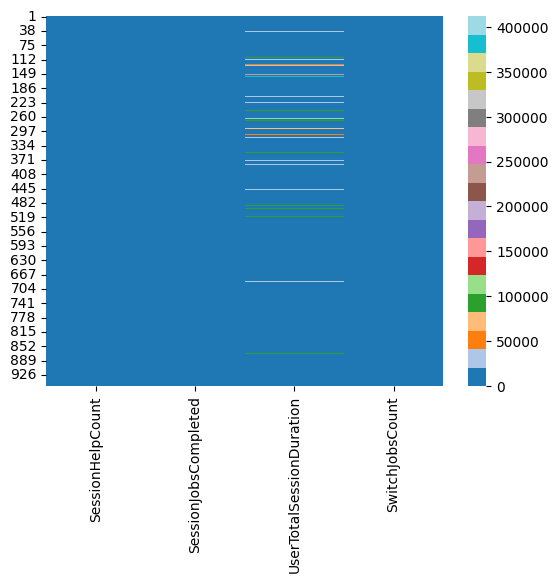

In [31]:
features1= ['SessionHelpCount','SessionJobsCompleted','UserTotalSessionDuration', 'SwitchJobsCount']

sns.heatmap(data = df_Aggregate[features1], cmap = 'tab20')

## Some aggregate feature visualization

In [32]:
#columns to compare with scatter plot
col1 = 'SessionJobsCompleted' #@param{type:"string"}
col2 = 'SwitchJobsCount'#@param{type:"string"}

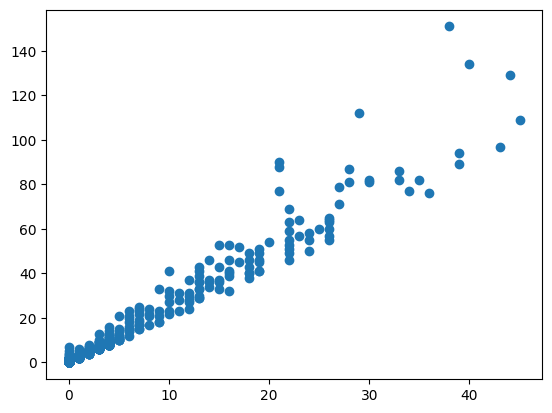

In [33]:
plt.scatter(df_Aggregate[col1], df_Aggregate[col2])

In [34]:
#scatter plot columns
col1 = 'SessionHelpCount' #@param{type:"string"}
col2 = 'SessionJobsCompleted'#@param{type:"string"}

Text(0, 0.5, 'SessionJobsCompleted')

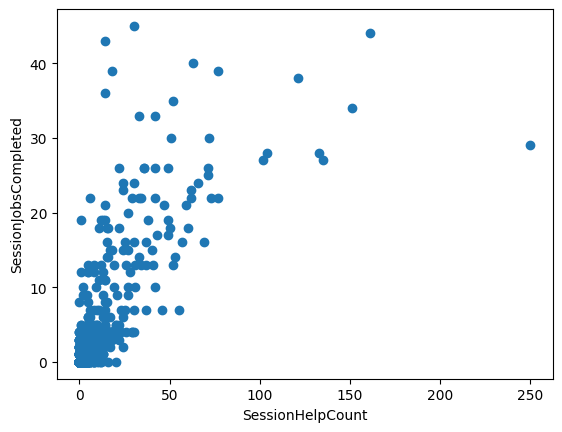

In [35]:
plt.scatter(df_Aggregate[col1], df_Aggregate[col2])
plt.xlabel(col1)
plt.ylabel(col2)

You may want to see more advanced relationship via plots. Here is an example

Text(0, 0.5, 'SessionJobsCompleted/UserTotalSessionDuration')

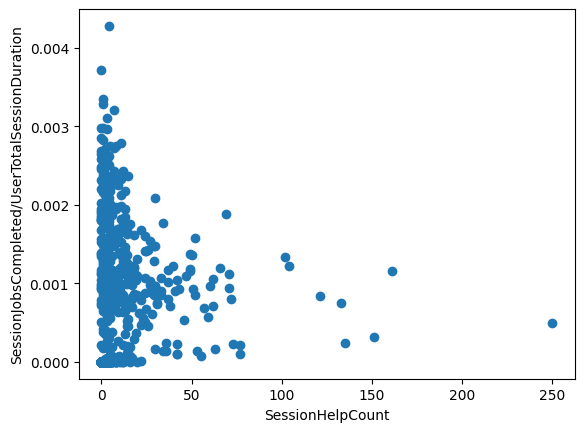

In [36]:
#scatter plot comparing help to jobs_completed/active time
plt.scatter(df_Aggregate.SessionHelpCount, df_Aggregate.SessionJobsCompleted/df_Aggregate.UserTotalSessionDuration) 
plt.xlabel("SessionHelpCount")
plt.ylabel("SessionJobsCompleted/UserTotalSessionDuration")

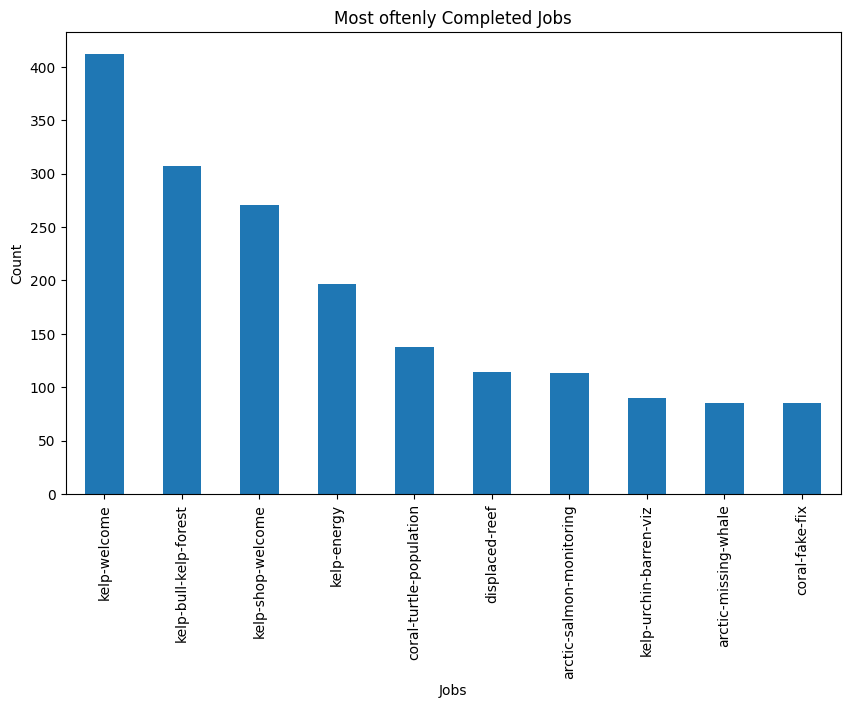

In [37]:
jobs_completed = df_Aggregate['JobsCompleted'].apply(eval).explode() # To make the list column into multiple rows.

job_counts = jobs_completed.value_counts()

plt.figure(figsize=(10, 6))
job_counts[:10].plot(kind='bar')
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.title('Most oftenly Completed Jobs')
plt.show()
